# Needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import emoji
from nltk.corpus import stopwords

# Read the pervious steps's output as input for the Step

- Show the Classes ( Dialects ) distribution to  know if the classes are balances or not 

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26095
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64


,dialect,Text
0,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,IQ,@KanaanRema مبين من كلامه خليجي
3,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


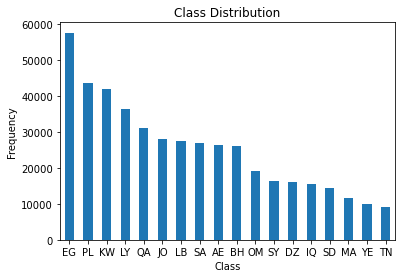

In [2]:
data = pd.read_csv("outputs/output_1.csv").drop(columns=['Unnamed: 0'])

Target_count=data['dialect'].value_counts()
print(Target_count)

Target_count.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

data= data [['dialect','Text']]
(data.head())


In [3]:
#!pip install imblearn

#X = data.drop('dialect',axis = 1)
#Y = data['dialect']


#from imblearn.under_sampling import RandomUnderSampler  
#nm = RandomUnderSampler  ()
#X_res,y_res=nm.fit_resample(X,Y)
#X_res.shape,y_res.shape

#data =pd.concat([X_res, y_res], axis=1)

#Target_count=data['dialect'].value_counts()
#Target_count.plot(kind = 'bar', rot=0)
#plt.title("Class Distribution")
#plt.xlabel("Class")
#plt.ylabel("Frequency")

# First step of preprocessing:  
# Selecting the emjis in the text to be deleted

### 1. Save all emojis in the whole dataset in a list and print the number of them

In [4]:
x =data['Text']

all_emoji=[]
for i in x:
    for emoji in re.findall(u'[\U0001f300-\U0001f650]|[\u2000-\u3000]', i):
        all_emoji.append(emoji)
        
print(len(all_emoji))

400038


### 2. Get the unique emojis to be input in the next step

In [5]:
# function to get unique values
x = np.array(all_emoji)
x=((np.unique(x)))
unique_eomji =(x.tolist())


### 3. Remove them from the dataframe by interating over all rows and replacing them with None

In [6]:
for emo in unique_eomji:
     data['Text'] = data['Text'].str.replace(emo, '')
        
data.head()

,dialect,Text
0,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,IQ,@KanaanRema مبين من كلامه خليجي
3,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه
4,IQ,@hmo2406 وين هل الغيبه اخ محمد


# Second step of preprocessing:  
# From looking at the data and trying to understand it, I noticed that there are two problems obviously appear in the text:
## 1. Username ( Words starting with @ sign )
## 2. English word starting with (http)

# So let's clean our DataFrame from the to be convenient for the Model training

In [7]:
#library that contains punctuation
import string
string.punctuation

#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', None)

#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def clean_http(X):
    X = X.split()
    X_new = [x for x in X if not x.startswith("http")]
    return ' '.join(X_new)



data['Text']=data['Text'].str.replace('(@\w+.*?)',"")
data['Text']= data['Text'].apply(lambda x:remove_punctuation(x))
data['Text']= data['Text'].apply(lambda x:clean_http(x))

#data.drop(columns=['Text'])
print(data.shape)
data.to_csv('outputs/test.csv')
data.head(40)

(458000, 2)


,dialect,Text
0,IQ,لكن بالنهاية ينتفض يغير
1,IQ,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون من الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب
2,IQ,مبين من كلامه خليجي
3,IQ,يسلملي مرورك وروحك الحلوه
4,IQ,وين هل الغيبه اخ محمد
5,IQ,يااخي الإرهابي اذا كان عراقي سعودي فلسطيني وين المشكلة على باب الفرضخليجي وماعنده رحمه وين المساس بقدسيتك الله يرضى عنك خلصت مشاكل العرب واختلفنا بجنسيت ابو الطفل المغردين سألوا من وين ورجحت وين الكارثة اللي وصلتك
6,IQ,مطلبي يقدم استقالته وفوگاها اعتذار
7,IQ,خلص والله لعيونكم انا ماعندي شيء معه بالعكس من متابعيني اللي بعتز فيهم خلص صافية لبن
8,IQ,يمكن سؤال فات الكثير اللي يصور شنو موقفه وكأنه يوثق بطوله المفروض حتى المصور يحال للقضاء لان نظرات الطفله تستنجد باتجاه الكاميرا
9,IQ,اولا اني ردت على رجل جنوبي واللي ذكر حجابها ثانياً انت شدعوه صايره محامي لكوهين صحيح مقولة العراق بلد الغرائب والعجائب



# These are the main Target Classes which will be replced with integers to be used in the Model training
- 'EG'    ,1
- 'PL'    ,2
- 'KW'    ,3
- 'LY'    ,4
- 'QA'    ,5
- 'JO'    ,6
- 'LB'    ,7
- 'SA'    ,8
- 'AE'    ,9
- 'BH'    ,10
- 'OM'    ,11
- 'SY'    ,12
- 'DZ'    ,13
- 'IQ'    ,14
- 'SD'    ,15
- 'MA'    ,16
- 'YE'    ,17
- 'TN'    ,18
 

In [8]:
data['dialect'].replace(to_replace=['EG'    ,
'PL'    ,
'KW'    ,
'LY'    ,
'QA'    ,
'JO'    ,
'LB'    ,
'SA'    ,
'AE'    ,
'BH'    ,
'OM'    ,
'SY'    ,
'DZ'    ,
'IQ'    ,
'SD'    ,
'MA'    ,
'YE'    , 
'TN'], value=[1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], inplace=True)
data.head(20)

,dialect,Text
0,14,لكن بالنهاية ينتفض يغير
1,14,يعني هذا محسوب على البشر حيونه ووحشيه وتطلبون من الغرب يحترمكم ويؤمن بدينكم ولاينعتكم بالإرهاب
2,14,مبين من كلامه خليجي
3,14,يسلملي مرورك وروحك الحلوه
4,14,وين هل الغيبه اخ محمد
5,14,يااخي الإرهابي اذا كان عراقي سعودي فلسطيني وين المشكلة على باب الفرضخليجي وماعنده رحمه وين المساس بقدسيتك الله يرضى عنك خلصت مشاكل العرب واختلفنا بجنسيت ابو الطفل المغردين سألوا من وين ورجحت وين الكارثة اللي وصلتك
6,14,مطلبي يقدم استقالته وفوگاها اعتذار
7,14,خلص والله لعيونكم انا ماعندي شيء معه بالعكس من متابعيني اللي بعتز فيهم خلص صافية لبن
8,14,يمكن سؤال فات الكثير اللي يصور شنو موقفه وكأنه يوثق بطوله المفروض حتى المصور يحال للقضاء لان نظرات الطفله تستنجد باتجاه الكاميرا
9,14,اولا اني ردت على رجل جنوبي واللي ذكر حجابها ثانياً انت شدعوه صايره محامي لكوهين صحيح مقولة العراق بلد الغرائب والعجائب


# Finally shuffle the data and Save it to be used in the Model training step

In [9]:
# Rows shuffling
data=data.sample(frac=1).reset_index(drop=True)
data.to_csv('outputs/output_2.csv')

# Removing Stopwords 
- I think that removing stopwords like: (هذا و ذلك و منذ ) in such task would not be useful, I mean it may be better for the model to train on them as there are specific countries use these words in their dialect.

In [10]:
#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords


In [11]:
#from nltk.corpus import stopwords
#stopwords_list = stopwords.words('arabic')
#print(stopwords_list)

In [12]:
from nltk.stem.isri import ISRIStemmer
lemmatizer = ISRIStemmer()
w_tokenizer = nltk.tokenize
def lemmatize_text(text):
    return [(lemmatizer.suf32(w)) for w in w_tokenizer.wordpunct_tokenize((text))]

In [13]:
data['Text']= data['Text'].apply(lambda x:lemmatize_text(x))
data.head(10)

,dialect,Text
0,8,"[والله, حتى, لو, طلعت, لي, العصا, احس, عيب, ماعطيه, حق, تعبه, في, هالحر, والشمس, حرام]"
1,15,"[عندي, واحد, صحبي, لو, قرا, التغريدة, دي, بقول, لي, حرك, البن, الباير]"
2,2,"[حبيبي, ياعمدة, احنا, مفيش, عند, عمد, احنا, عدنا, مخاتير, انتو, محظوظ, عدكم, عمد]"
3,10,"[النفيش, صار, بوب, كورن, شاي, حليب, صار, كرك, كيك, بو, نص, صار, كب, كيك, الهايته, صارت, فاشنيستا, مالت, على, الاتيكيت, الاخيرة, أليمه, من, يهيت, وياي]"
4,14,"[شعجب, هذا, ممسويلك, بلوك]"
5,11,"[يسولف, عند, الي, جنبه, وبيروح, النوم, وبعد, يخلص, شغله]"
6,2,"[عجب, كڤر, الموبايل, على, لون, البلوزة]"
7,17,"[كلهم, عيال, الكلب, يدافع, عن, وطن, وشعب, وأنا, المواطن, الخا, اللي, يسرقوه, كل, يوم, بسم, الوطنية, اميرالجاكي]"
8,16,"[رجل, عندو, سبع, عام, مع, خطيبتو, اللي, فعمر, 67, عام, Its, never, too, late, to, fall, in, love]"
9,4,"[ههههههههههه, انا, بطلت, انرد, على, حد, وتوا, جربت, روحي, وماشيه, تمام]"
